# Harshit Yadav

# The Sparks Foundation

## Task1

## Prediction using Supervised ML

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting familiar with data

In [2]:
df=pd.read_csv('task1.txt')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Analyzing Data

Text(0.5, 1.0, 'No. of hours spent')

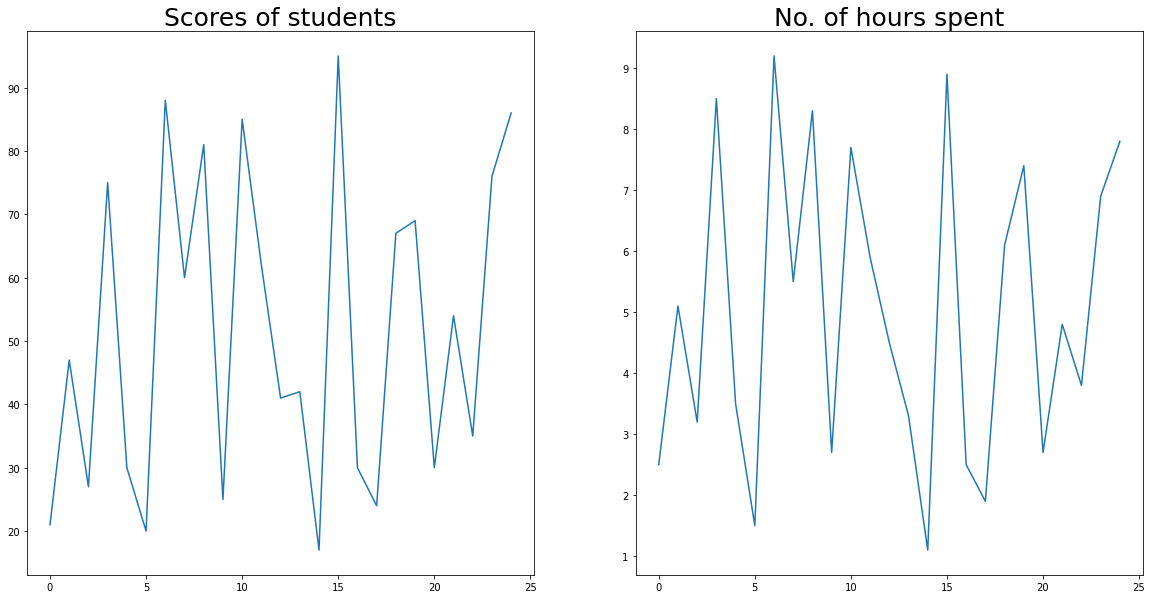

In [5]:
plt.figure(figsize=(20,10))
ax1=plt.subplot(1,2,1)
plt.plot(df['Scores'])
plt.title('Scores of students',fontsize=25)
ax2=plt.subplot(1,2,2)
plt.plot(df['Hours'])
plt.title('No. of hours spent', fontsize=25)

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Score achieved VS No. of hours spent')

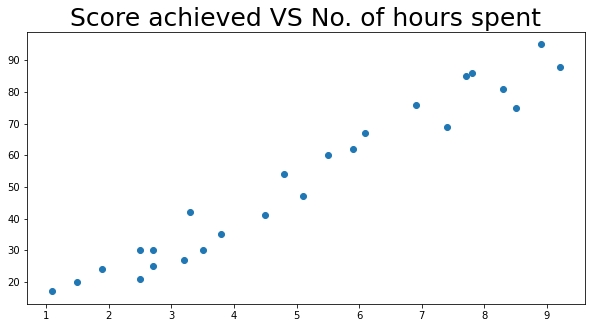

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(y=df['Scores'],x=df['Hours'])
plt.title('Score achieved VS No. of hours spent', fontsize=25)

normalization not considered

# Builiding Model 

In [8]:
X,y=df['Hours'].to_numpy().reshape(-1,1),df['Scores'].to_numpy().reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

### From data analysis it is cear that Linear Regression will work the best

In [10]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression().fit(X_train,y_train)
linreg.coef_,linreg.intercept_

(array([[9.94167834]]), array([1.93220425]))

In [11]:
linreg.score(X_test,y_test)

0.9367661043365055

### Visualizing Model

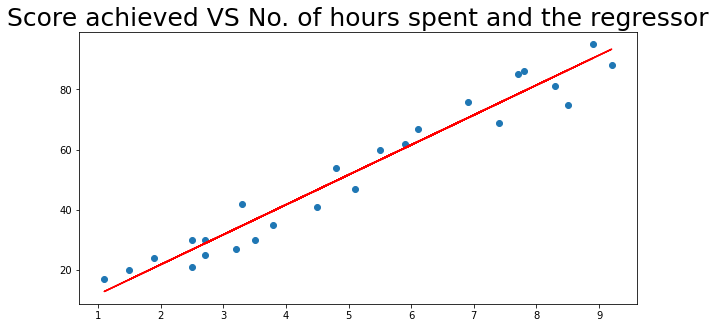

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(y=df['Scores'],x=df['Hours'])
plt.title('Score achieved VS No. of hours spent and the regressor', fontsize=25)
plt.plot(df['Hours'],linreg.coef_*X+linreg.intercept_,color='red')

## Evaluating Model

In [13]:
###Evaluation, r2score close to 1->good model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
error_mse=mean_squared_error(y_test,linreg.predict(X_test))
r2score=r2_score(y_test,linreg.predict(X_test))
error_mse,r2score

(20.33292367497997, 0.9367661043365055)

### Objective Completed

In [14]:
###finished
linreg.predict([[9.25]])

array([[93.89272889]])

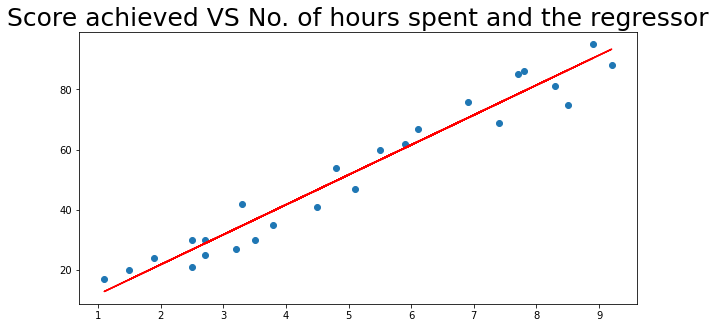

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(y=df['Scores'],x=df['Hours'])
x = np.linspace(0, 10)
plt.title('Score achieved VS No. of hours spent and the regressor', fontsize=25)
plt.plot(df['Hours'],(linreg.coef_)*X+(linreg.intercept_),color='red')

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

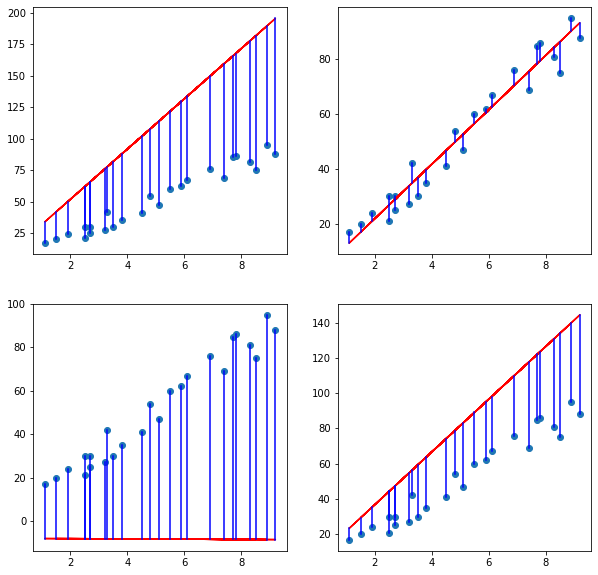

In [31]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0][0].scatter(y=df['Scores'],x=df['Hours'])
axs[0][0].plot(df['Hours'],(linreg.coef_+10)*X+(linreg.intercept_+10),color='red')
for i,j in zip(df["Hours"],df["Scores"]):
    axs[0][0].plot((i, i), (min((linreg.coef_+10)*i+(linreg.intercept_+10),j), max((linreg.coef_+10)*i+(linreg.intercept_+10),j)), color="blue")
#axs[0, 0].set_title('Axis [0, 0]')
axs[0][1].scatter(y=df['Scores'],x=df['Hours'])
axs[0][1].plot(df['Hours'],(linreg.coef_)*X+(linreg.intercept_),color='red')
for i,j in zip(df["Hours"],df["Scores"]):
    axs[0][1].plot((i, i), (min((linreg.coef_)*i+(linreg.intercept_),j), max((linreg.coef_)*i+(linreg.intercept_),j)), color="blue")
#axs[0, 1].set_title('Axis [0, 1]')
axs[1][0].scatter(y=df['Scores'],x=df['Hours'])
axs[1][0].plot(df['Hours'],(linreg.coef_-10)*X+(linreg.intercept_-10),color='red')
for i,j in zip(df["Hours"],df["Scores"]):
    axs[1][0].plot((i, i), (min((linreg.coef_-10)*i+(linreg.intercept_-10),j), max((linreg.coef_-10)*i+(linreg.intercept_-10),j)), color="blue")
#axs[1, 0].set_title('Axis [1, 0]')
axs[1][1].scatter(y=df['Scores'],x=df['Hours'])
axs[1][1].plot(df['Hours'],(linreg.coef_+5)*X+(linreg.intercept_+5),color='red')
for i,j in zip(df["Hours"],df["Scores"]):
    axs[1][1].plot((i, i), (min((linreg.coef_+5)*i+(linreg.intercept_+5),j), max((linreg.coef_+5)*i+(linreg.intercept_+5),j)), color="blue")
#axs[1, 1].set_title('Axis [1, 1]')




C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


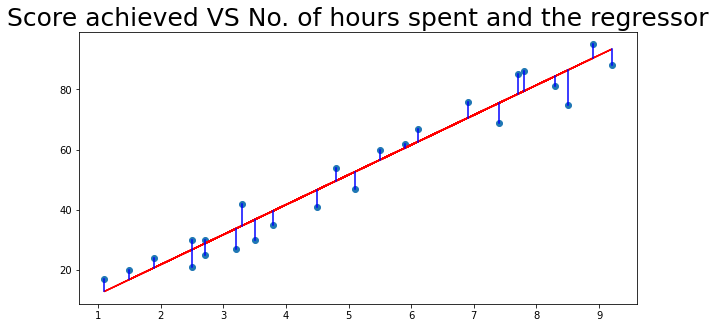

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(y=df['Scores'],x=df['Hours'])
x = np.linspace(0, 10)
plt.title('Score achieved VS No. of hours spent and the regressor', fontsize=25)
plt.plot(df['Hours'],(linreg.coef_)*X+(linreg.intercept_),color='red')
for x,y in zip(df["Hours"],df["Scores"]):
    #print(x,y)
    plt.plot((x, x), (min((linreg.coef_)*x+(linreg.intercept_),y), max((linreg.coef_)*x+(linreg.intercept_),y)), color="blue")
#plt.plot((5, 5), (0, 100), scaley = False)